# Multiple Linear Regression (MLR) - Cars93

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
pd.set_option('display.max_columns', 12)

In [82]:
df = pd.read_csv('Cars93.csv')
print(df[:2])

  Manufacturer    Model     Type  Min.Price  Price  Max.Price  ...  Turn.circle  Rear.seat.room Luggage.room Weight  \
0        Acura  Integra    Small       12.9   15.9       18.8  ...           37            26.5         11.0   2705   
1        Acura   Legend  Midsize       29.2   33.9       38.7  ...           38            30.0         15.0   3560   

    Origin           Make  
0  non-USA  Acura Integra  
1  non-USA   Acura Legend  

[2 rows x 27 columns]


In [9]:
# select variables

In [10]:
list1 = ['MPG.city','Cylinders','EngineSize','Horsepower',
         'RPM','Passengers','Weight']
df1 = df[list1]
df1[:5]

,MPG.city,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,25,4,1.8,140,6300,5,2705
1,18,6,3.2,200,5500,5,3560
2,20,6,2.8,172,5500,5,3375
3,19,6,2.8,172,5500,6,3405
4,22,4,3.5,208,5700,4,3640


In [11]:
df1.dtypes

MPG.city        int64
Cylinders      object
EngineSize    float64
Horsepower      int64
RPM             int64
Passengers      int64
Weight          int64
dtype: object

In [12]:
# Cylinders is not numeric

In [13]:
df1.Cylinders.unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [14]:
# There is a category called rotary (not numeric)

In [15]:
pd.value_counts(df1.Cylinders)

4         49
6         31
8          7
3          3
5          2
rotary     1
Name: Cylinders, dtype: int64

In [16]:
# Only one car with rotary cylinder

In [17]:
df1[df1.Cylinders == 'rotary']

,MPG.city,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
56,17,rotary,1.3,255,6500,2,2895


In [18]:
# remove it

In [19]:
df2 = df1[df1.Cylinders != 'rotary'].copy()

In [20]:
pd.value_counts(df2.Cylinders)

4    49
6    31
8     7
3     3
5     2
Name: Cylinders, dtype: int64

In [21]:
df2.iloc[53:58,]

,MPG.city,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
53,28,4,1.8,103,5500,5,2440
54,26,4,2.5,164,5600,5,2970
55,18,6,3.0,155,5000,7,3735
57,20,4,2.3,130,5100,5,2920
58,19,6,3.2,217,5500,5,3525


In [22]:
# change Cylinders to numeric

In [23]:
df2.Cylinders = df2.Cylinders.astype('int64')
df2.dtypes

MPG.city        int64
Cylinders       int64
EngineSize    float64
Horsepower      int64
RPM             int64
Passengers      int64
Weight          int64
dtype: object

#### Select predictor columns and the response

In [24]:
y0 = df2['MPG.city']
X0 = df2.drop(columns = 'MPG.city',axis = 1)

## MLR with sklearn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model1 = LinearRegression().fit(X0,y0)

In [27]:
model1.intercept_

36.919974688013575

In [28]:
model1.coef_

array([ 0.1014525 ,  0.87431541, -0.03032167,  0.00161991, -0.2384795 ,
       -0.00661264])

In [29]:
X0[:5]

,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,4,1.8,140,6300,5,2705
1,6,3.2,200,5500,5,3560
2,6,2.8,172,5500,5,3375
3,6,2.8,172,5500,6,3405
4,4,3.5,208,5700,4,3640


In [30]:
pd.DataFrame(model1.coef_,columns = ['coef'],
             index = X0.columns)

,coef
Cylinders,0.101453
EngineSize,0.874315
Horsepower,-0.030322
RPM,0.001620
Passengers,-0.238479
Weight,-0.006613


In [31]:
# sklearn prediction

In [32]:
newvalue = X0[:1].copy()
newvalue

,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,4,1.8,140,6300,5,2705


In [33]:
newvalue.Cylinders = 6
newvalue.EngineSize = 1.9
newvalue.Horsepower = 150
newvalue.RPM = 6600
newvalue.Passengers = 6
newvalue.Weight = 2800
newvalue

,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,6,1.9,150,6600,6,2800


In [34]:
# predict MPG.city

In [35]:
model1.predict(newvalue)

array([25.38678406])

## MLR with statsmodels.api

In [36]:
import statsmodels.api as sm

In [37]:
X1 = X0.copy()
X1.insert(0,'const',1)
X1[:4]

,const,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,1,4,1.8,140,6300,5,2705
1,1,6,3.2,200,5500,5,3560
2,1,6,2.8,172,5500,5,3375
3,1,6,2.8,172,5500,6,3405


In [38]:
m1 = sm.OLS(y0,X1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG.city   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     38.61
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.79e-22
Time:                        15:42:01   Log-Likelihood:                -228.40
No. Observations:                  92   AIC:                             470.8
Df Residuals:                      85   BIC:                             488.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9200      7.294      5.062      0.000      22.417      51.423
Cylinders      0.1015      0.570      0.178      0.859      -1.031       1.234
EngineSize     0.8743      1.076      0.813      0.419      -1.264       3.013
Horsepower    -0.0303      0.023     -1.344      0.183      -0.075       0.015
RPM            0.0016      0.001      1.418      0.160      -0.001       0.004
Passengers    -0.2385      0.540     -0.441      0.660      -1.313       0.836
Weight        -0.0066      0.002     -4.006      0.000      -0.010      -0.003
==============================================================================
Omnibus:                       51.274   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.138
Skew:                           1.723   Prob(JB):                     8.72e-52
Kurtosis:                      10.034   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
m1.params

const         36.919975
Cylinders      0.101453
EngineSize     0.874315
Horsepower    -0.030322
RPM            0.001620
Passengers    -0.238479
Weight        -0.006613
dtype: float64

In [40]:
# yhat = 36.92 + 0.1014 Cylinders + 0.874 EngineSize 
#              -0.03 Horsepower + 0.0016 RPM 
#              -0.2385 Passengers -0.0066 Weight

# interpret equation

# City mileage increases by 0.1014 for each additional cylinder

# City mileage decreases by 0.0066 for each additional pound

### Model Adequacy values

In [41]:
m1.rsquared

0.7315906125539785

In [42]:
# Model explains 73.2% of City mileage variability

In [43]:
adjr2 = m1.rsquared_adj
adjr2

0.7126440675577888

In [44]:
# variance of y (MST)

In [45]:
MST = np.var(y0,ddof = 1)
MST

31.609531772575227

In [46]:
# MSE

In [47]:
MSE = MST * (1 - adjr2)
MSE

9.083186476570058

In [48]:
# Estimated Constant variance is 9.08 squared-miles

In [49]:
# S 

In [50]:
S = np.sqrt(MSE)
S

3.013832522979679

In [51]:
# Average distance to regression plane is 3.014 miles

### Predictions

In [52]:
# dataframe with predictor values

In [53]:
newvalue.insert(0, 'constant',1)
newvalue

,constant,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,1,6,1.9,150,6600,6,2800


In [54]:
m1.predict(newvalue)

0    25.386784
dtype: float64

In [55]:
# get CI and PI

In [56]:
d2 = m1.get_prediction(newvalue)
d2.summary_frame(alpha = 0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,25.386784,1.439436,22.993032,27.780536,19.832545,30.941024


### Plot y vs yhat (predictions)

In [57]:
yhat = m1.fittedvalues

In [58]:
# Divide (10,45) into 100 segments. 
# Store values in xvals

In [59]:
xvals = np.linspace(10,45,100)
yvals = xvals

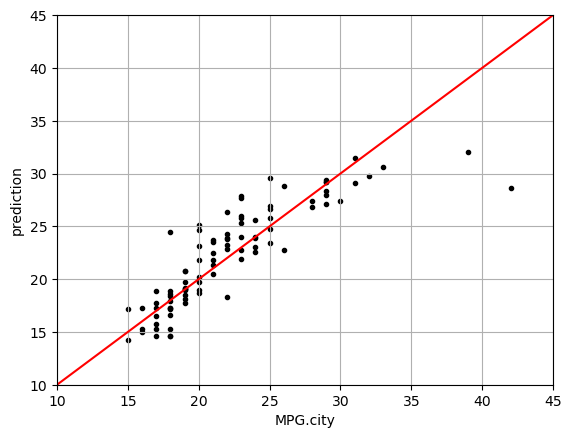

In [60]:
plt.figure()
plt.scatter(y0,yhat,s=9,color='k')
# plot diagonal line
plt.plot(xvals,yvals,color='r')
plt.xlim(10,45)
plt.ylim(10,45)
plt.xlabel('MPG.city')
plt.ylabel('prediction')
plt.grid()

Use residuals to find the outlier

In [61]:
dfres = m1.resid

In [62]:
# Create a DataFrame with residuals

In [63]:
dfres = pd.DataFrame(dfres,columns = ['residuals'])
dfres[:5]

,residuals
0,-0.780371
1,-0.438275
2,-0.160895
3,-0.724036
4,3.711458


In [64]:
# Find largest positive and largest negative residuals

In [65]:
dfres[(dfres.residuals == dfres.residuals.max()) | 
      (dfres.residuals == dfres.residuals.min())]

,residuals
41,13.391697
90,-6.439563


In [66]:
# The largest residual is in row 41

In [67]:
# Use column 26 to find the car name

In [68]:
df.iloc[41,26]

'Honda Civic'

In [69]:
# Write the car name on the plot

In [70]:
label41 = df.iloc[41,26]

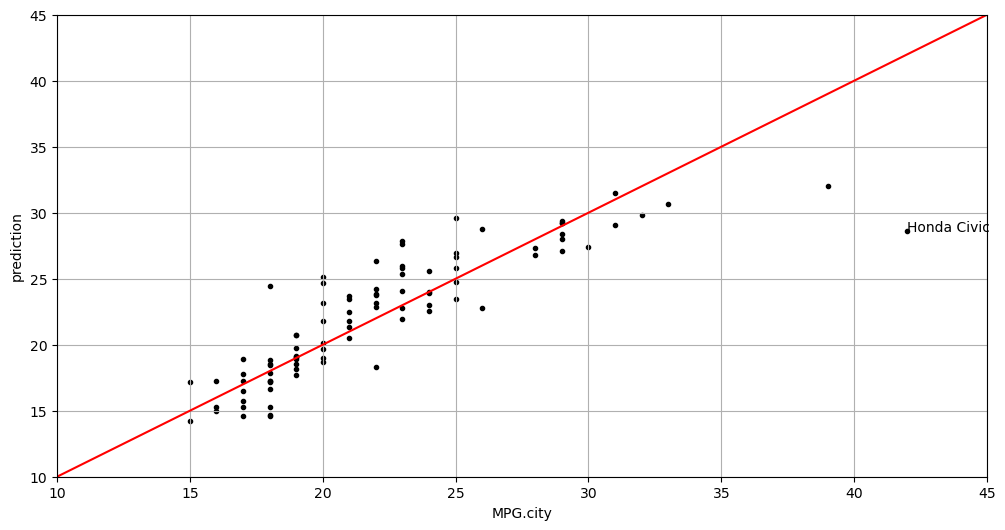

In [71]:
plt.figure(figsize = (12,6))
plt.scatter(y0,yhat,s=9,color='k')
# plot diagonal line
plt.plot(xvals,yvals,color='r')
plt.xlim(10,45)
plt.ylim(10,45)
plt.xlabel('MPG.city')
plt.ylabel('prediction')
plt.grid()
# write car name on the plot
plt.annotate(label41,(y0[41],yhat[41]));

## MLR with statsmodels.formula.api

In [72]:
import statsmodels.formula.api as smf

In [73]:
df2.columns

Index(['MPG.city', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Passengers', 'Weight'], dtype='object')

In [74]:
df2.rename(columns = {'MPG.city':'MPG_city'}, inplace = True)
df2.columns

Index(['MPG_city', 'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Passengers', 'Weight'], dtype='object')

In [90]:
m2 = smf.ols(formula = 'MPG_city ~ Cylinders + EngineSize + Horsepower + RPM + Passengers + Weight', 
             data = df2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_city   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     38.61
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.79e-22
Time:                        15:48:29   Log-Likelihood:                -228.40
No. Observations:                  92   AIC:                             470.8
Df Residuals:                      85   BIC:                             488.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9200      7.294      5.062      0.000      22.417      51.423
Cylinders      0.1015      0.570      0.178      0.859      -1.031       1.234
EngineSize     0.8743      1.076      0.813      0.419      -1.264       3.013
Horsepower    -0.0303      0.023     -1.344      0.183      -0.075       0.015
RPM            0.0016      0.001      1.418      0.160      -0.001       0.004
Passengers    -0.2385      0.540     -0.441      0.660      -1.313       0.836
Weight        -0.0066      0.002     -4.006      0.000      -0.010      -0.003
==============================================================================
Omnibus:                       51.274   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.138
Skew:                           1.723   Prob(JB):                     8.72e-52
Kurtosis:                      10.034   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
m2.params

Intercept     36.919975
Cylinders      0.101453
EngineSize     0.874315
Horsepower    -0.030322
RPM            0.001620
Passengers    -0.238479
Weight        -0.006613
dtype: float64

In [86]:
newvalue = X0[:1].copy()
newvalue

,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,4,1.8,140,6300,5,2705


In [87]:
newvalue.Cylinders = 6
newvalue.EngineSize = 1.9
newvalue.Horsepower = 150
newvalue.RPM = 6600
newvalue.Passengers = 6
newvalue.Weight = 2800
newvalue

,Cylinders,EngineSize,Horsepower,RPM,Passengers,Weight
0,6,1.9,150,6600,6,2800


In [88]:
# prediction

In [89]:
m2.predict(newvalue)

0    25.386784
dtype: float64